In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [299]:
data=pd.read_csv(r'pulsar_stars.csv')
data.shape

(17898, 9)

In [300]:
data.sample(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
3773,103.539062,39.989237,0.536292,1.186278,0.715719,11.058500,17.553076,334.961350,0
1365,128.101562,49.357883,0.045821,0.171523,1.092809,10.276231,15.840627,332.384099,0
1823,99.460938,42.128135,0.384026,0.423775,5.438127,30.673249,5.727733,31.989898,0
6158,141.421875,56.411658,0.012052,-0.479288,3.878763,22.338185,7.380728,60.860640,0
2317,135.531250,54.031232,-0.133616,-0.234672,1.368729,13.197509,13.767886,223.967030,0


In [301]:
data=data.rename(columns={' Mean of the integrated profile':'mean_profile',' Standard deviation of the integrated profile':'standard_profile',' Excess kurtosis of the integrated profile':'kurtosis_profile',' Skewness of the integrated profile':'skewness_profile',' Mean of the DM-SNR curve':'mean_dmsnr_curve',' Standard deviation of the DM-SNR curve':'std_dmsnr_curve',' Excess kurtosis of the DM-SNR curve':'kurtosis_dmsnr_curve',' Skewness of the DM-SNR curve':'skewness_dmsnr_curve'})

data.isnull().any()

mean_profile            False
standard_profile        False
kurtosis_profile        False
skewness_profile        False
mean_dmsnr_curve        False
std_dmsnr_curve         False
kurtosis_dmsnr_curve    False
skewness_dmsnr_curve    False
target_class            False
dtype: bool

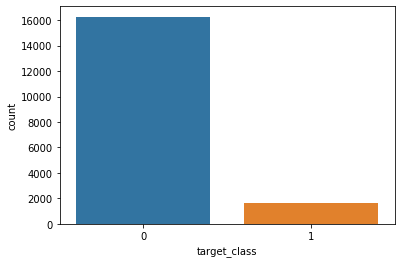

In [302]:
sns.countplot(x='target_class',data=data)

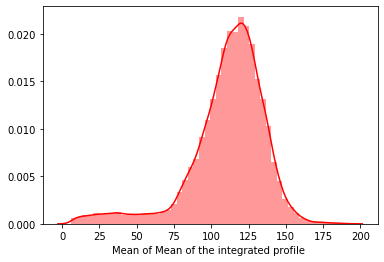

In [303]:
target = data['mean_profile']
sns.distplot(target,color='r')
plt.xlabel("Mean of Mean of the integrated profile ")
plt.show()


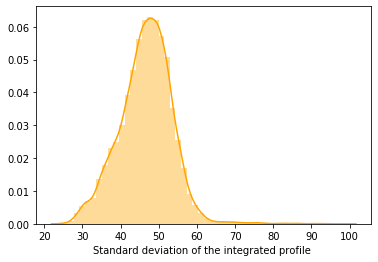

In [304]:
target = data['standard_profile']
sns.distplot(target,color='orange')
plt.xlabel("Standard deviation of the integrated profile ")
plt.show()


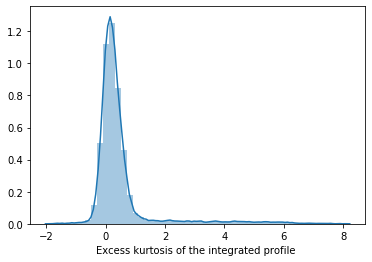

In [305]:
target = data['kurtosis_profile']
sns.distplot(target)
plt.xlabel("Excess kurtosis of the integrated profile ")
plt.show()

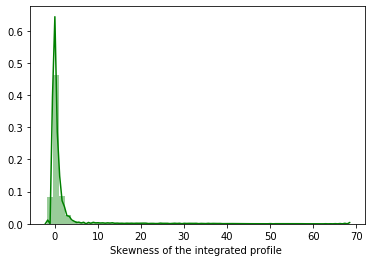

In [306]:
target = data['skewness_profile']
sns.distplot(target,color='g')
plt.xlabel("Skewness of the integrated profile ")
plt.show()

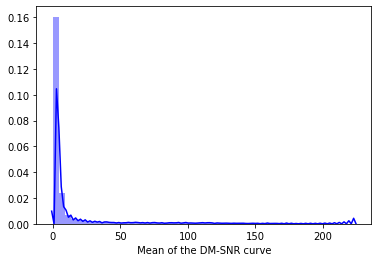

In [307]:
target = data['mean_dmsnr_curve']
sns.distplot(target,color='b')
plt.xlabel(" Mean of the DM-SNR curve ")
plt.show()

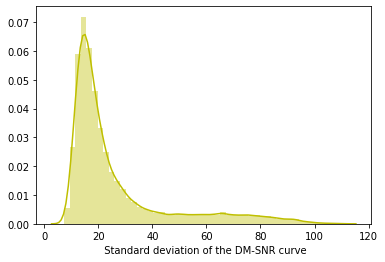

In [308]:
target = data['std_dmsnr_curve']
sns.distplot(target,color='y')
plt.xlabel("  Standard deviation of the DM-SNR curve ")
plt.show()

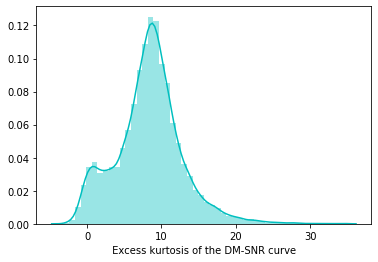

In [309]:
target = data['kurtosis_dmsnr_curve']
sns.distplot(target,color='c')
plt.xlabel(" Excess kurtosis of the DM-SNR curve ")
plt.show()

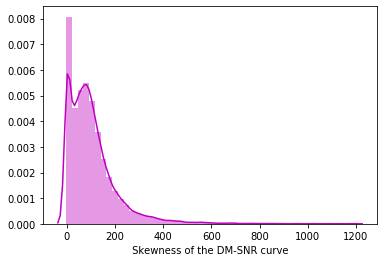

In [310]:
target = data['skewness_dmsnr_curve']
sns.distplot(target,color='m')
plt.xlabel(" Skewness of the DM-SNR curve ")
plt.show()

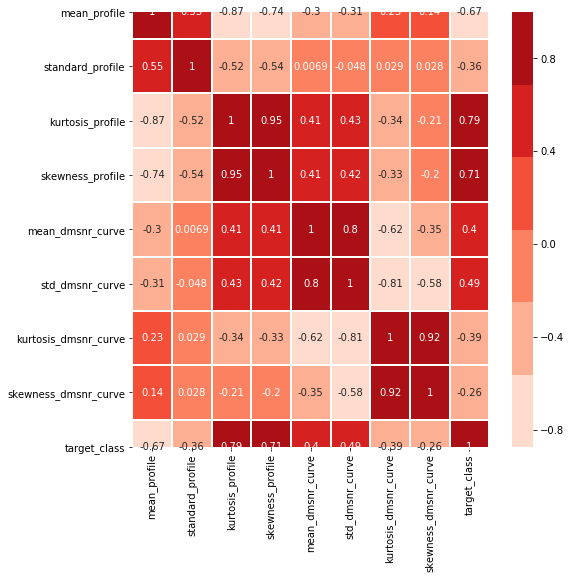

In [311]:
correlation = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("Reds"),
            linewidth=1,edgecolor="k")
#plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()


In [323]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



In [324]:
x=data.drop(['target_class'],axis=1)
#x = StandardScaler().fit_transform(x)
y=data.target_class

In [325]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [326]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Ajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [342]:
pred=model.predict(X_test)

In [343]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [344]:
accuracy_score(y_test,pred)

0.9812849162011174

In [345]:
array=confusion_matrix(y_test,pred)
print(array)


[[3254   20]
 [  47  259]]


[Text(0, 0.5, 'Not pulsar'), Text(0, 1.5, 'Pulsar')]

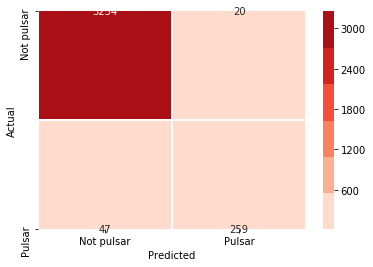

In [331]:
#plt.figure(figsize=(5,5))

# sns.heatmap(array,annot=True,fmt='d',cmap=sns.color_palette("RdBu_r"),linewidths=1)
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.title('Confusion Matrix')
ax=plt.subplot()
sns.heatmap(array,annot=True,
            cmap=sns.color_palette("Reds"),fmt='d',
            linewidth=1,edgecolor="k",ax=ax)
ax.set_xlabel('Predicted')

ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['Not pulsar','Pulsar'])
ax.yaxis.set_ticklabels(['Not pulsar','Pulsar'])

In [2]:
import pickle



In [333]:
#save model
with open('pulsar_pickle','wb') as f:
    pickle.dump(model,f)

In [3]:
# load the model from disk
with open('pulsar_pickle','rb') as f:
    mp=pickle.load(f)

In [12]:
pred=mp.predict([[125.4375,55.18332374,0.016503739,-0.510120963,2.026755853,16.52349963,9.749287863,106.1926626]])

In [13]:
print('Not Pulsar'if pred[0]==0 else 'Pulsar')

Not Pulsar
